# Attributing data can yeld insight 

There are many instances we would like to make accurate on-depth comparison between picks and other well data. This can be done inside log analysis software, but sometimes it is difficult to get all data onto a sensible scale with readable axis. Sometimes Python is a better tool for this.
 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet as mps
from matplotlib import gridspec
import seaborn as sns
sns.color_palette("mako", as_cmap=True)


from utilities import *

## 0. Import data and define constants

In [37]:
picks = pd.read_csv('1_Pre-processed data.csv')
beds = picks[(picks['type'] == 'Bed boundary')].copy()
fractures = picks[(picks['type'] == 'Conductive, HC') | (picks['type'] == 'Conductive, LC')].copy()
mudlog = pd.read_csv('1_pre-processed mudlog.csv')

# these imports and boolean statements are from the second notebook, 
# so we have not included the usual checks

In [38]:
top_m = picks['depth_m'].min() - 1
bot_m = picks['depth_m'].max() + 1

In [39]:
# define a lithology color palette

color_dict = dict({
    'Rock A': 'tab:blue',
    'Rock B': 'tab:green',
})

## 1. Plot picks by depth with categorical data



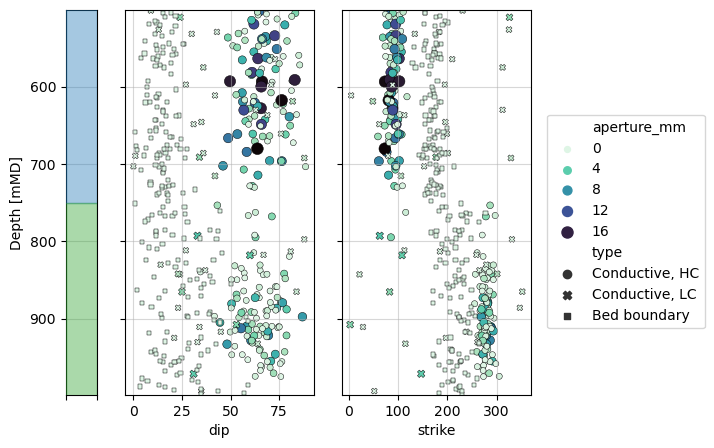

In [51]:
fig = plt.figure(figsize=(6, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[0.5,3,3], figure=fig)

ax1 = fig.add_subplot(spec[0]) # geology
ax2 = fig.add_subplot(spec[1]) # dips
ax3 = fig.add_subplot(spec[2]) # strikes

# Plot lithology colors



for top, bot, col in zip(mudlog.from_m.values, mudlog.to_m, mudlog.lithology.values):

    ax1.axhspan(
        top, 
        bot, 
        color = color_dict[col], 
        alpha=.4,
        zorder = 9,
        )


# Plot picks
sns.scatterplot(
    x='dip', 
    y='depth_m', 
    hue='aperture_mm', 
    # set color palette
    palette='mako_r',
    style='type',
    size='aperture_mm',
    edgecolor='k',
    data=picks, 
    ax=ax2,
    legend=False
    )

sns.scatterplot(
    x='strike', 
    y='depth_m', 
    hue='aperture_mm', 
    # set color palette
    palette='mako_r',
    style='type',
    size='aperture_mm',
    edgecolor='k',
    data=picks, 
    ax=ax3,
    #legend=False
    )


for ax in [ax1, ax2, ax3]:
    ax.set_ylim(bot_m, top_m)
    ax.grid(alpha=0.5, zorder=0)

# drop unnecessary axis labels

for ax in [ax2, ax3]:
    ax.axes.yaxis.set_ticklabels([])
    ax.set_ylabel('')

ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel('Depth [mMD]')

ax3.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.45), 
    ncol=1);

## 2. Plot picks by depth with continuous data

In [ ]:
# make synthetic continuous data

num_points = 1000

# Generate evenly spaced 'x' values
measurements = np.linspace(0, 20, num_points)

# Add small random noise to 'x' values
noise_scale = 5 # Adjust the noise scale as needed
noise = np.random.normal(0, noise_scale, num_points)

# Create the 'y' values
measurement_depth_m = np.linspace(top_m, bot_m, num_points)

# Add noise to 'x' values
x_with_noise = measurements + noise

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, figsize=(5,7), sharey=True)

ax1.scatter(fractures.aperture_mm.values, fractures.depth_m.values, s=10, c='k', marker='o')

ax2.plot(x_with_noise, measurement_depth_m, c='k', lw=0.5)

line_depth = 750
for ax in [ax1, ax2]:
    ax.axhline(line_depth, color='tab:red', lw=2)
    ax.axhspan(line_depth, bot_m, color='tab:red', alpha=0.1)

ax1.set_ylim(bot_m, top_m)
ax1.set_ylabel('Depth [m-MDRF]')
ax1.set_xlabel('Fracture aperture [mm]')

ax2.set_xlabel('Synthetic data')